In [1]:
import pandas, numpy, seaborn, sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## functions & options


# I] Dataframe settings

In [2]:
%%time
#Open the big expression data
path =  "/home/adrian/scratch/zscore.tsv"
df = pandas.read_csv(path, sep = "\t", index_col='sample')

print(df.shape)
df.head()

(46490, 4385)
CPU times: user 31.1 s, sys: 1.46 s, total: 32.6 s
Wall time: 33.2 s


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-X88G-0426-SM-47JZ5,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-WHPG-0226-SM-3NMB9,GTEX-P44H-0526-SM-2XCF1,GTEX-11ONC-2326-SM-5HL6P,...,GTEX-144GO-0126-SM-5LUAO,GTEX-1313W-1626-SM-5J1OE,GTEX-12ZZY-1526-SM-5LZWF,GTEX-QMRM-0826-SM-3NB33,GTEX-OOBK-2626-SM-2HMKY,GTEX-1117F-2826-SM-5GZXL,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN
sample,,,,,,,,,,,,,,,,,,,,,
ENST00000625998.2,0.201517,0.036483,-2.678424,-1.913425,-0.196345,-1.555508,0.632833,-2.103236,0.078840,-0.065244,...,-1.851241,-0.028877,0.104782,-1.695963,-0.742029,-0.091520,0.168139,-1.158666,1.260004,-0.326773
ENST00000583693.5,-0.157536,-0.387785,0.348795,0.398806,-1.129253,0.687884,0.582988,0.557330,-1.350953,-1.209634,...,-0.173132,-1.156789,-0.024576,0.025022,0.682437,-0.352807,2.375209,-0.067561,2.293898,-0.429855
ENST00000012134.6,-1.858374,-0.230357,-1.101552,-1.678630,0.351186,-0.498028,0.051742,0.196520,-0.976582,0.499852,...,-0.537618,-0.037223,0.879018,-1.132267,0.183165,-0.377856,-0.203226,-0.120816,1.457736,-0.879079
ENST00000403263.5,1.824639,0.803760,-0.939061,-0.804629,-0.097733,-0.456441,2.261055,0.277584,2.031893,-0.600251,...,-0.607003,-0.588132,0.423970,0.384197,-1.341820,0.128895,-0.985785,0.765705,0.074665,-1.675408
ENST00000449352.6,-0.714858,0.391161,-0.649496,-0.251540,0.275481,-0.622791,0.703996,-0.210234,-1.321825,0.461139,...,1.286650,-1.422651,0.540561,-0.532098,-1.155870,-1.024148,0.439395,-0.473859,-1.347097,-2.987846


# II] Clusters  - KMeans 

In [3]:
%%time
# 9 is the best number of cluster
kmeans_model = KMeans(n_clusters = 9, random_state=1, verbose=False).fit(df)
labels = kmeans_model.labels_
# Find what cluster for each gene
pred_cluster = kmeans_model.predict(df)
print(pred_cluster)
#add the prediction in a column
df['cluster'] = pred_cluster
df.head()

[0 3 7 ... 4 5 0]
CPU times: user 19min 26s, sys: 2.97 s, total: 19min 29s
Wall time: 1min 3s


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-X88G-0426-SM-47JZ5,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-WHPG-0226-SM-3NMB9,GTEX-P44H-0526-SM-2XCF1,GTEX-11ONC-2326-SM-5HL6P,...,GTEX-1313W-1626-SM-5J1OE,GTEX-12ZZY-1526-SM-5LZWF,GTEX-QMRM-0826-SM-3NB33,GTEX-OOBK-2626-SM-2HMKY,GTEX-1117F-2826-SM-5GZXL,GTEX-11ZTS-3326-SM-5LU9Y,GTEX-ZA64-2126-SM-5Q5A8,GTEX-Q2AG-2826-SM-2HMJQ,GTEX-XV7Q-0426-SM-4BRVN,cluster
sample,,,,,,,,,,,,,,,,,,,,,
ENST00000625998.2,0.201517,0.036483,-2.678424,-1.913425,-0.196345,-1.555508,0.632833,-2.103236,0.078840,-0.065244,...,-0.028877,0.104782,-1.695963,-0.742029,-0.091520,0.168139,-1.158666,1.260004,-0.326773,0
ENST00000583693.5,-0.157536,-0.387785,0.348795,0.398806,-1.129253,0.687884,0.582988,0.557330,-1.350953,-1.209634,...,-1.156789,-0.024576,0.025022,0.682437,-0.352807,2.375209,-0.067561,2.293898,-0.429855,3
ENST00000012134.6,-1.858374,-0.230357,-1.101552,-1.678630,0.351186,-0.498028,0.051742,0.196520,-0.976582,0.499852,...,-0.037223,0.879018,-1.132267,0.183165,-0.377856,-0.203226,-0.120816,1.457736,-0.879079,7
ENST00000403263.5,1.824639,0.803760,-0.939061,-0.804629,-0.097733,-0.456441,2.261055,0.277584,2.031893,-0.600251,...,-0.588132,0.423970,0.384197,-1.341820,0.128895,-0.985785,0.765705,0.074665,-1.675408,0
ENST00000449352.6,-0.714858,0.391161,-0.649496,-0.251540,0.275481,-0.622791,0.703996,-0.210234,-1.321825,0.461139,...,-1.422651,0.540561,-0.532098,-1.155870,-1.024148,0.439395,-0.473859,-1.347097,-2.987846,8


In [4]:
#Final answer
ATG7_1 = 'ENST00000354449.7'
ATG7_2 = 'ENST00000354956.9'

print(df['cluster'][[ATG7_1, ATG7_2]])

sample
ENST00000354449.7    2
ENST00000354956.9    1
Name: cluster, dtype: int32


In [5]:
print('The two transcripts are not in the same cluster. BINGO ')

The two transcripts are not in the same cluster. BINGO 


# IV] Clustermap

In [6]:
seaborn.hls_palette(9)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7178666666666667, 0.33999999999999997),
 (0.6554666666666664, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.7178666666666667),
 (0.33999999999999997, 0.6554666666666664, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.7178666666666661, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6554666666666664)]

In [7]:
# %%time
# # #pop the cluster column
# cluster_uniq = df.pop("cluster")
# #use one color per cluster group
# lut = dict(zip(cluster_uniq.unique(), seaborn.hls_palette(4)))
# row_colors_clust = cluster_uniq.map(lut)
# #plot
# seaborn.clustermap(df, cmap='bwr', col_cluster=True, row_cluster=True,
#                    row_colors= row_colors_clust, 
#                    method = "complete", metric = 'correlation',
#                    yticklabels= '', xticklabels = '',
#                    cbar_kws={'label':'expression [z-score]'})

In [8]:
#sort the df with the cluster numbers.
df = df.sort_values('cluster')

#save index of 1st row of each clusters for horizontal line
nb_cluster = 9
horiz_line_pos = []
print('First row for each clusters:')
for i in range(1,nb_cluster):
    
    first_index = df.reset_index().loc[df.reset_index()['cluster'].isin([i])].index[0]
    horiz_line_pos.append(first_index)

print(horiz_line_pos)

First row for each clusters:
[5478, 11949, 16492, 22805, 26701, 31053, 35953, 41853]


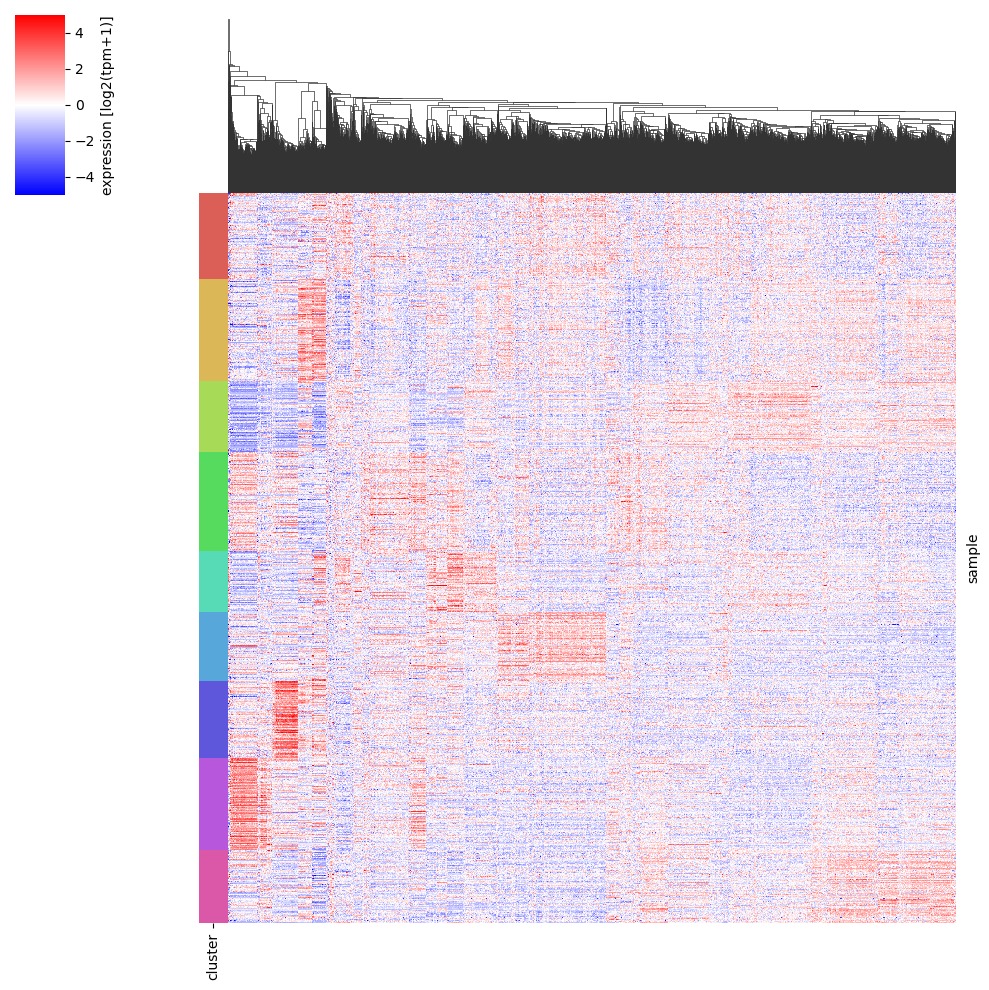

CPU times: user 5min 2s, sys: 13.5 s, total: 5min 15s
Wall time: 5min 15s


In [9]:
%%time
# #pop the cluster column
cluster_uniq = df.pop("cluster")

#use one color per cluster group 
lut = dict(zip(cluster_uniq.unique(), seaborn.hls_palette(9)))
row_colors_clust = cluster_uniq.map(lut)

#plot
seaborn.clustermap(df, cmap='bwr', col_cluster=True, row_cluster=False,
                   row_colors= row_colors_clust, 
                   yticklabels= '', xticklabels = '',
                   vmin=-5, vmax=5, 
                   cbar_kws={'label':'expression [log2(tpm+1)]'})

plt.hlines(horiz_line_pos, xmin=0, xmax=4386, colors = 'black', label='LAAA')
plt.show()
plt.close()